# **Team members:** Isabel Chen, Owen Davis, Katelyn Poon, Edwin Lopez, Sethya Pugal

## **Topic: iEval and Voting (supplementary)**
### We are interesting in students's behavior in filling iEval survey and their intentions to vote in the upcoming presidential election, aiming to identify any correlations between these factors and various collected parameters.

## **1. What data do you have**
###275 survery date collected from students of cs111 and cs105. We are interested in the following questions:


In [95]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/CS105 W24 Survey (Responses) - Form Responses.csv')
#file_path = "/content/CS105 W24 Survey (Responses) - Form Responses.csv"
#df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
#iEval Questions:
Complete = 'Did you complete an iEval evaluation last quarter(Fall or last quarter you attended)? Choose one that applies:'
comment = 'Do you leave comments on an iEval? Select all that apply:'
fill_iEval ='When filling out an iEval, which of the following statements resonate with your experience and approach? Select all that apply.'
change = "How much change do you believe iEvals will lead to in your class? "

all5 = 'I give the highest evaluation to liked professors (all 5s).'
all1 = 'I give the lowest evaluation to disliked professors (all 1s).'
#Voting Question:
voting = "Would you vote in the upcoming presidential election, regardless of eligibility (age, nationality, etc.)?"
#General Question:
Influence = 'What influenced your decision to choose your current major/department at UCR?'
ethnicity_question = "What is your ethnicity?"
gender = "What gender do you identify as?"
completed = "Did you complete an iEval evaluation last quarter(Fall or last quarter you attended)? Choose one that applies:"
change = "How much change do you believe iEvals will lead to in your class? "

#seth
ethnicity_question = "What is your ethnicity?"
gender = "What gender do you identify as?"
voting = "Would you vote in the upcoming presidential election, regardless of eligibility (age, nationality, etc.)?"
completed = "Did you complete an iEval evaluation last quarter(Fall or last quarter you attended)? Choose one that applies:"
change = "How much change do you believe iEvals will lead to in your class? "
news = "How many minutes a week (on average) do you watch/read the news?"

#Imposter Syndrome, Mental Health Question and Change in iEvals:
#df.columns[87] = 'On a scale of 1 - 5 how much did you experience imposter syndrome in your first quarter at UCR?'
imposter = df.columns[87]
#df.columns[86] = 'How would you rate your current state of mental wellbeing?'
mental = df.columns[86]
#df.columns[40] = 'How much change do you believe iEvals will lead to in your class?'
changes = df.columns[40]
#heatmap index for mental and imposter
impostermental = [df[mental], df[imposter]]

#Screentime
screentime = df.columns[68]
phone = "How often are you using your phone in class?"

In [97]:
#Cleaning, Splitting iEval Questions responses 1: Did you complete an iEval evaluation last quarter(Fall or last quarter you attended)? Choose one that applies:
specific_answer = "I did for some not for all of my classes. I wanted to leave good reviews for TA's and Professors, but I missed the deadline for some."
target_answer = "Yes, I wanted to voice my opinion on professor/course."
df[Complete] = df[Complete].apply(lambda x: target_answer if x == specific_answer else x)
df[Complete]= df[Complete].fillna(df[Complete].fillna(df[Complete].mode()[0]))
complete_dummies = pd.get_dummies(df[Complete])
# Concatenate the original DataFrame with the new binary columns
df = pd.concat([df, complete_dummies], axis=1)
response_categories = [
    "Yes. Class Incentive (e.g., extra credit or reward).",
    "Yes, I wanted to voice my opinion on professor/course.",
    "No. Lack of incentives.",
    "No. I missed the deadline.",
    "No. Too inconvenient or time-consuming."
]
df[Complete].value_counts()

Yes. Class Incentive (e.g., extra credit or reward).      116
Yes, I wanted to voice my opinion on professor/course.     98
No. Lack of incentives.                                    28
No. I missed the deadline.                                 19
No. Too inconvenient or time-consuming.                    15
Name: Did you complete an iEval evaluation last quarter(Fall or last quarter you attended)? Choose one that applies:, dtype: int64

In [98]:
#Cleaning, Splitting iEval Questions responses 2: Do you leave comments on an iEval? Select all that apply:
commment_categories = set()
df[comment]= df[comment].fillna(df[comment].mode()[0])
df[comment].str.split(', ').apply(commment_categories.update)
for category in commment_categories:
    df[category] = 0

for index, row in df.iterrows():
    identify_options = row[comment].split(', ')
    for option in identify_options:
        if option in commment_categories:
          df.at[index, option] = 1

category_counts = df[list(commment_categories)].sum()
categories_to_drop = category_counts[category_counts == 1].index
df.drop(columns=categories_to_drop, inplace=True)
commment_categories = commment_categories - set(categories_to_drop)
category_counts = df[list(commment_categories)].sum()
print(category_counts)

When something is wrong               88
Never                                 19
When something is worth reporting    150
I never fill out an iEval             17
When something is good                83
Always                                65
dtype: int64


In [99]:
#Cleaning, Splitting iEval Questions responses 3: When filling out an iEval, which of the following statements resonate with your experience and approach? Select all that apply.
df[fill_iEval] = df[fill_iEval].fillna('Prefer not to say')
fill_categories = set()
df[fill_iEval].str.split(', ').apply(fill_categories.update)
for category in fill_categories:
    df[category] = 0

for index, row in df.iterrows():
    identify_options = row[fill_iEval].split(', ')
    for option in identify_options:
        if option in fill_categories:
          df.at[index, option] = 1

category_counts = df[list(fill_categories)].sum()
categories_to_drop = category_counts[category_counts == 1].index
df.drop(columns=categories_to_drop, inplace=True)
fill_categories = fill_categories - set(categories_to_drop)
category_counts = df[list(fill_categories)].sum()
print(category_counts)

I would prefer fewer iEval questions.                                 82
I would prefer a more convenient and user-friendly iEval process.     98
I fill out the form with neutral bias.                               115
I give the lowest evaluation to disliked professors (all 1s).         20
Prefer not to say                                                     10
I give the highest evaluation to liked professors (all 5s).           67
I never fill out  iEvals                                              20
I take my time to fill out the iEvals                                 82
dtype: int64


In [100]:
#Cleaning, Splitting iEval Questions responses 4: How much change do you believe iEvals will lead to in your class?
df[change] = df[change].fillna(df[change].mode()[0])
change_categories = set()
df[change].str.split(', ').apply(change_categories.update)  # Update the set with all unique categories

# Initialize the new DataFrame with columns for each category
for category in change_categories:
    df[category] = 0

# Populate the DataFrame with 1s and 0s
for index, row in df.iterrows():
    identify_options = row[change].split(', ')
    for option in identify_options:
        if option in change_categories:
          df.at[index, option] = 1
category_counts = df[list(change_categories)].sum()
print(category_counts)

Some Change             89
No Change               42
Minimal Change         132
Considerable Change     13
dtype: int64


In [101]:
#Cleaning interested column: 'What influenced your decision to choose your current major/department at UCR?'
value_counts = df[Influence].value_counts()
to_replace = value_counts[value_counts == 1].index
df[Influence] = df[Influence].apply(lambda x: 'Other' if x in to_replace else x)
df[Influence]= df[Influence].fillna('Other')

In [102]:
#Cleaning on Ethnicity Column

def ethnicity_other(threshold):
    ethnicity_column = df[ethnicity_question]
    ethnicity_counts = ethnicity_column.value_counts()
    filtered_ethnicity_counts = ethnicity_counts[ethnicity_counts < threshold]

def ethinicity_cleaning(threshold):
    ethnicity_column = df[ethnicity_question]
    ethnicity_counts = ethnicity_column.value_counts()
    df["Ethnicity_Grouped"] = df[ethnicity_question].apply(
        lambda x: "Other" if ethnicity_counts.get(x, 0) < threshold else x)

ethinicity_cleaning(10)
print(df["Ethnicity_Grouped"].value_counts())

Asian                 173
Other                  35
Hispanic or Latino     33
White                  23
Asian, White           12
Name: Ethnicity_Grouped, dtype: int64


##**Completion of iEval and Reason for Choosing Major (Isabel Chen)**

**(1)What would you like to know?**

Whether there is a correlation between students' completion of the iEval survey and their influences for choosing their major at UCR.


**(2)Explore and present the data.**




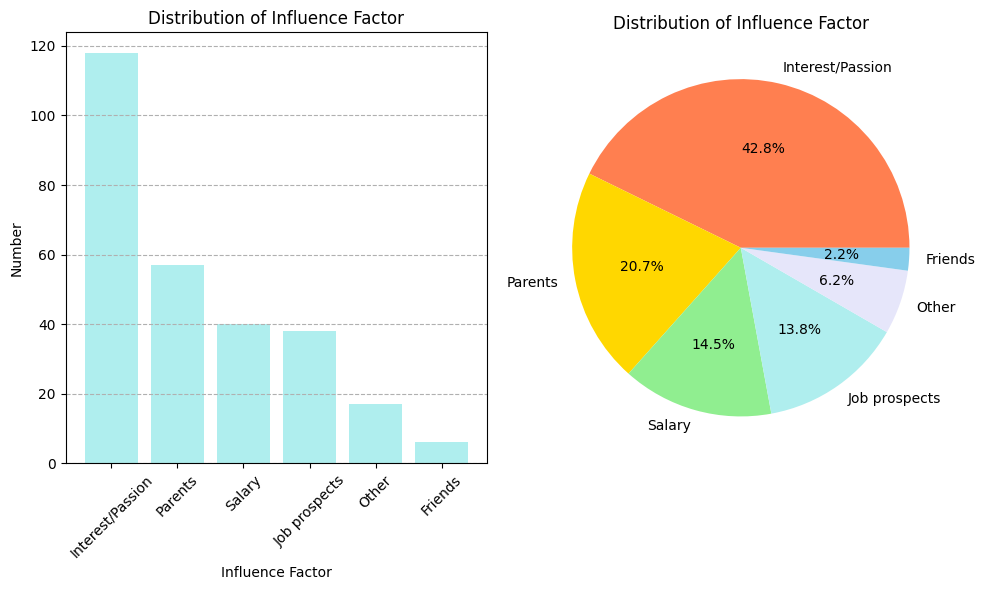

In [103]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
influence_counts = df[Influence].value_counts()
ax[0].bar(influence_counts.index, influence_counts.values, color='paleturquoise')
ax[0].set_title('Distribution of Influence Factor')
ax[0].grid(axis='y', linestyle='--')
ax[0].set_xlabel('Influence Factor')
ax[0].set_ylabel('Number')
ax[0].tick_params(axis='x', rotation=45)
ax[1].pie(influence_counts, labels=influence_counts.index, autopct='%1.1f%%', colors=['coral', 'gold', 'lightgreen', 'paleturquoise', 'lavender', 'skyblue'])
ax[1].set_title('Distribution of Influence Factor')
ax[1].set_ylabel('')
plt.tight_layout()
plt.show()

a. Distribution of Student's reason to pick their major
* Majority of the studends pick their major based on 'Interest/Passion' (46%). Other notable factors include 'Parents' (20.7%), 'Job prospects' (13.8%), and 'Salary' (14.5%).

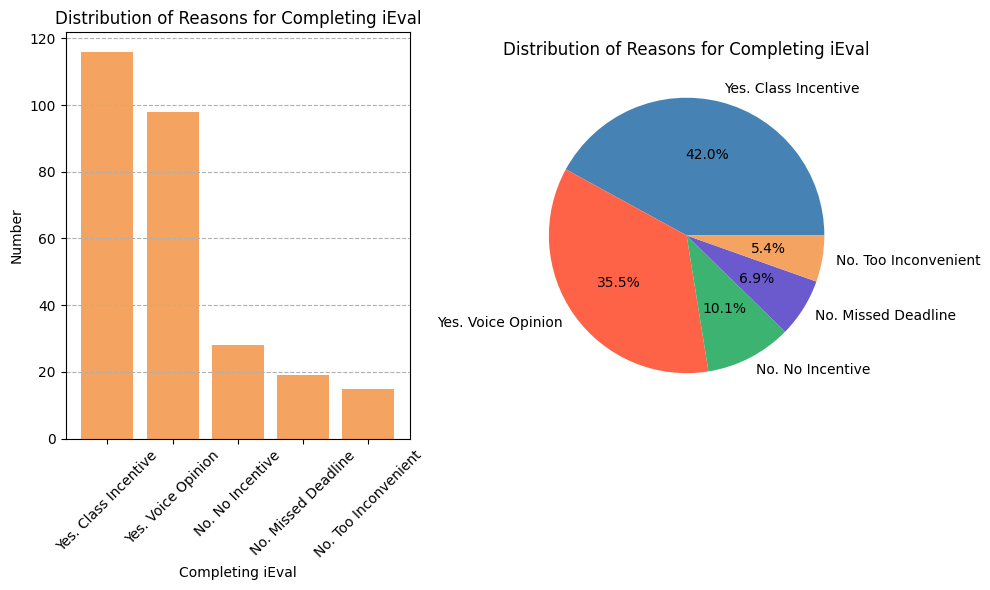

In [104]:
answer_mapping = {
    "Yes. Class Incentive (e.g., extra credit or reward).": "Yes. Class Incentive",
    "Yes, I wanted to voice my opinion on professor/course.": "Yes. Voice Opinion",
    "No. Lack of incentives.": "No. No Incentive",
    "No. I missed the deadline.": "No. Missed Deadline",
    "No. Too inconvenient or time-consuming.": "No. Too Inconvenient"
}
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
Complete_short = 'Complete_short'
df[Complete_short] = df[Complete].map(answer_mapping)
complete_short_counts = df[Complete_short].value_counts()
ax[0].bar(complete_short_counts.index, complete_short_counts.values, color='sandybrown')
ax[0].set_title('Distribution of Reasons for Completing iEval')
ax[0].grid(axis='y', linestyle='--')
ax[0].set_xlabel('Completing iEval')
ax[0].set_ylabel('Number')
ax[0].tick_params(axis='x', rotation=45)
ax[1].pie(complete_short_counts, labels=complete_short_counts.index, autopct='%1.1f%%', colors=['steelblue', 'tomato', 'mediumseagreen', 'slateblue', 'sandybrown'])
ax[1].set_title('Distribution of Reasons for Completing iEval')
ax[1].set_ylabel('')
plt.tight_layout()
plt.show()

b. Distribution for their reasons to filling or not filling out an iEval.

Most students (77.5%) has filled out an iEval with two main reasons: for 'Incentive' (42%) and for 'Voicing Opinion' (35.5%).

In [105]:
#df['Incentive'] = df[Complete].apply(lambda x: 1 if x == 'Yes. Class Incentive (e.g., extra credit or reward).' else 0)
#Opinion = 'Yes, I wanted to voice my opinion'
Opinion = 'Opinion'
df[Opinion] = df[Complete].apply(lambda x: 'Voice Opinion' if x == 'Yes, I wanted to voice my opinion on professor/course.' else 'No Opinion')
cross_tab_influence_Opinion = pd.crosstab(df[Influence], df[Opinion])
cross_tab_influence_Opinion = cross_tab_influence_Opinion.rename_axis("Influence Factor")

#Drop Friends and Other Only have 6 people choose Friends
cross_tab_influence_Opinion = cross_tab_influence_Opinion.drop(['Friends','Other'])
cross_tab_influence_Opinion

Opinion,No Opinion,Voice Opinion
Influence Factor,,
Interest/Passion,69,49
Job prospects,25,13
Parents,36,21
Salary,32,8


c. Independence for Influence on Major Choice and iEval Opinion Expression at UCR


This shows the number of students in each category. Before working on conditional probability, I want to see the distribution of my data. Here, I have decided to drop the 'Friends' and 'Other' categories, as their numbers are too small to be representative

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


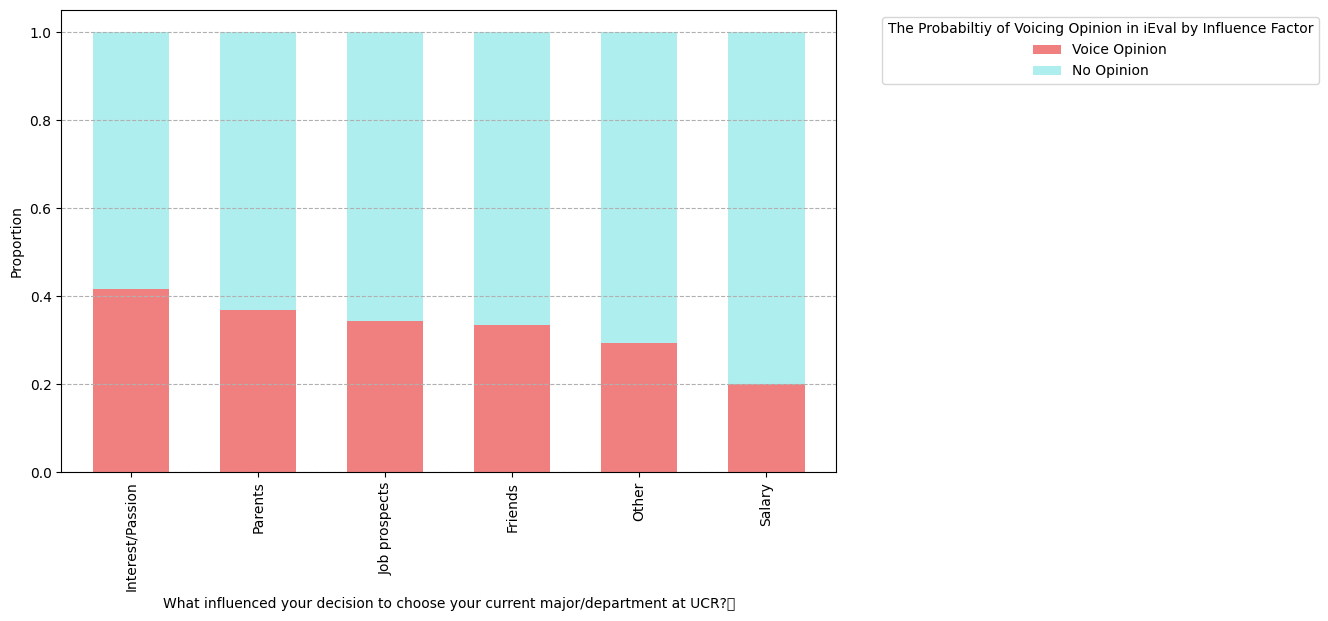

Opinion,No Opinion,Voice Opinion
What influenced your decision to choose your current major/department at UCR?,,
Interest/Passion,0.584746,0.415254
Job prospects,0.657895,0.342105
Parents,0.631579,0.368421
Salary,0.800000,0.200000


In [106]:
cross_tab_influence_Opinion_condition = pd.crosstab(df[Influence], df[Opinion], normalize=0 )
cross_tab_influence_Opinion_condition= cross_tab_influence_Opinion_condition.sort_values(by='No Opinion')
cross_tab_influence_Opinion_condition = cross_tab_influence_Opinion_condition[['Voice Opinion', 'No Opinion']]
bar_colors = ['lightcoral', 'paleturquoise']
cross_tab_influence_Opinion_condition.plot(kind='bar', figsize=(10, 6), color=bar_colors, width=0.6, stacked=True)
plt.legend(title='The Probabiltiy of Voicing Opinion in iEval by Influence Factor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.xlabel('What influenced your decision to choose your current major/department at UCR?	')
plt.ylabel('Proportion')
plt.show()

cross_tab_influence_Opinion = pd.crosstab(df[Influence], df[Opinion],normalize=0).drop(['Friends','Other'])
cross_tab_influence_Opinion


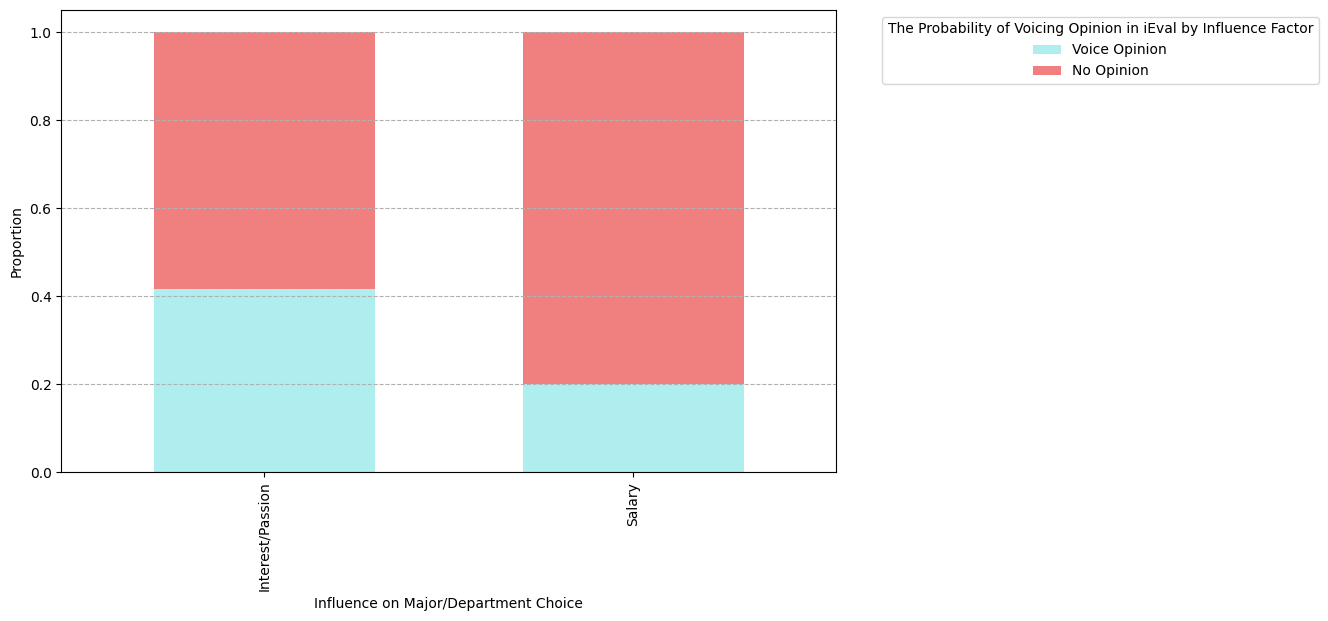

In [125]:
# Create the cross-tabulation and normalize it
cross_tab_influence_Opinion_condition = pd.crosstab(df[Influence], df[Opinion], normalize=0)

# Filter the DataFrame to keep only the 'Interest/passion' and 'Salary' rows
selected_influences = cross_tab_influence_Opinion_condition.loc[['Interest/Passion', 'Salary']]

# Ensure the order of columns is ['Voice Opinion', 'No Opinion']
selected_influences = selected_influences[['Voice Opinion', 'No Opinion']]

# Define the colors, where 'paleturquoise' is for 'Voice Opinion' and 'lightcoral' is for 'No Opinion'
bar_colors = ['paleturquoise', 'lightcoral']

# Plot the filtered stacked bar chart
selected_influences.plot(kind='bar', figsize=(10, 6), color=bar_colors, width=0.6, stacked=True)

# Add the legend, grid, labels, and show the plot
plt.legend(title='The Probability of Voicing Opinion in iEval by Influence Factor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.xlabel('Influence on Major/Department Choice')
plt.ylabel('Proportion')
plt.show()


d. Given the students' influence factor, what is their probability of voicing their opinion in iEval?
* Those who selected their major based on **Interest/Passion** appear to voice their  opinion in iEval with a probability of **0.42**;
* Individuals who chose their major based on **Salary** tend to voice their opinion less frequently than other groups, with a probability of **0.20**.
* The difference in numbers (0.42 vs 0.20) marks a contrast between students choosing their major based on interest/passion versus salary, which could affect their likelihood oto voice their opinion in iEval.

**(4) Can you state any hypotheses or make predictions? Which tests can you apply to verify your hypothesis?**

**Hyphothesis 1** Students likelihood to voice their opinion in iEval is depent of whether a student's major choice was influenced by 'Interest/Passion' or 'Salary'
*   **Method**: Chi-Square Test

**(5) Test hypotheses and predictions**

**Hyphotheses Test 1**

**H0:**  If Students likelihood to **voice their opinion** in iEval is indepent of whether a student's major choice was influenced by **'Interest/Passion'** or **'Salary'**


In [107]:
data = pd.DataFrame({'No Opinion':[68,32],'Voice Opinion':[49,8]},index = ['Interest/Passion','Salary'])
chi, p, dfree, expected = chi2_contingency(data)
print("calculated chi square value: " ,chi)
print("calculated p value: " ,p)
print("degree of freedom: ", dfree)

calculated chi square value:  5.261408353951116
calculated p value:  0.021803368473729927
degree of freedom:  1


**Chi-Square Test:**
* **p-value 0.0218**
* calculated chi square value:  5.26
* calculated p value:  0.0218
* degree of freedom:  1

##**Conclusion**
---
According to the chi square test, there is a statistically significant association between whether a student's major choice was influenced by 'Interest/Passion' or 'Salary' and their likelihood to voice their opinion in iEval.



The above heatmap reveals a clear trend: as students progress in their university journey, their belief in iEvals' ability to drive change decreases. This indicates that prolonged exposure to the academic system and its feedback mechanisms may weaken students' initial optimism about the impact of iEvals.

This shift in perspective among older or more tenured students highlights a potential challenge for university administrators and educators: maintaining the credibility and perceived effectiveness of the iEval system. It suggests a need for actionable responses to iEval feedback, ensuring that students see tangible improvements in their educational environment.

#**Exploration of Imposter Syndrome/Mental Wellbeing and iEval Impact (Katelyn Poon)**

Text(0, 0.5, 'Number of Students')

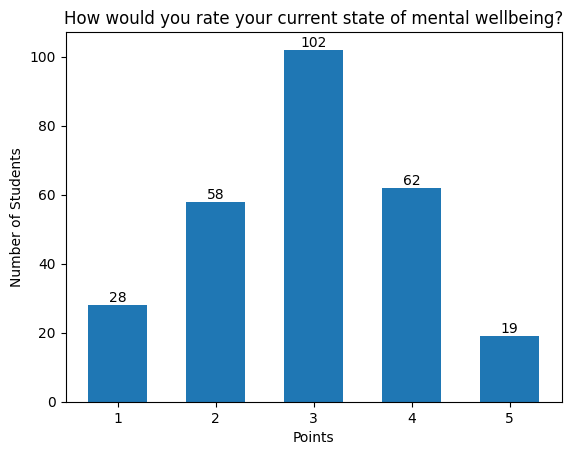

In [108]:
mentals = df[mental]
mental_counts = mentals.value_counts()
mental_labels = mental_counts.sort_index()

mentalchart = plt.bar(mental_labels.index, mental_labels.values, width = 0.6)
plt.bar_label(mentalchart, labels = mental_labels.values, label_type = "edge")
plt.title(mental)
plt.xlabel("Points")
plt.ylabel("Number of Students")

A bar graph representing the mental health of students at UCR on a 1-5 rating scale with 1 being the lowest and 5 being the highest. The graph appears to be unimodal and centered around 3.0. This indicates that most ucr students tend to report a rating of 3 for their mental health.

Text(0, 0.5, 'Number of Students')

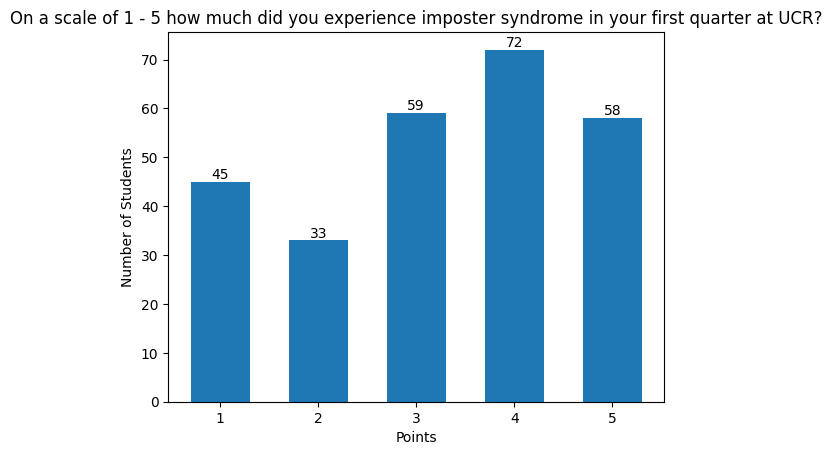

In [109]:
imposters = df[imposter]
imposter_counts = imposters.value_counts()
imposter_labels = imposter_counts.sort_index()

imposterchart = plt.bar(imposter_labels.index, imposter_labels.values, width = 0.6)
plt.bar_label(imposterchart, labels = imposter_labels.values, label_type = "edge")
plt.title(imposter)
plt.xlabel("Points")
plt.ylabel("Number of Students")

A bar graph representing the the experience of imposter syndrome in students during their first quarter at UCR on a 1-5 rating scale with 1 being the lowest and 5 being the highest. The graph appears to be unimodal and centered around 4.0. Unlike the bar graph for mental health, this graph is more skewed to the left. This indicates that most students tend to report a higher rating for their experinece in imposter syndrome.

Text(50.722222222222214, 0.5, 'Mental Health Points')

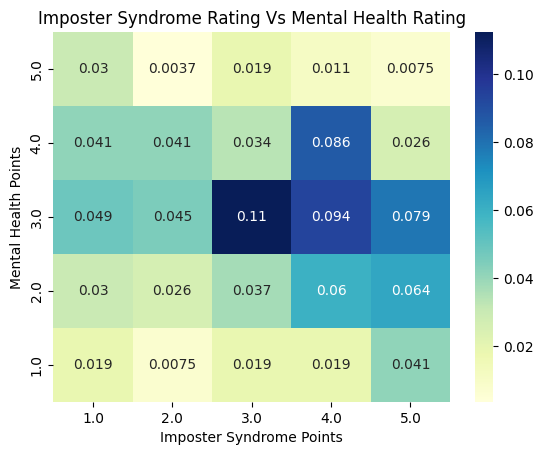

In [110]:
cross_table3 = pd.crosstab(impostermental[0],impostermental[1])
normalize3 = cross_table3.div(cross_table3.sum().sum())
table3 = sns.heatmap(normalize3, cmap = 'YlGnBu', annot = True)
table3.invert_yaxis()
plt.title("Imposter Syndrome Rating Vs Mental Health Rating")
plt.xlabel("Imposter Syndrome Points")
plt.ylabel("Mental Health Points")

This is a heatmap comparing the relationship between a student's imposter syndrome rating and mental health rating. Each block represents a proportion of students who reported the imposter syndrome and mental health rating pair. The darker blue areas represent a higher concentration while the light yellow areas represent a lower concentration. Based on the heatmap, most students reported an imposter syndrome rating of 3 and a mental health rating of 3. Other blue areas tend to fall around areas where imposter syndrome is 3-5 and mental health is 3-4. This suggests that students tend to report a higher rating for imposter syndrome with an average rating for mental health.

Text(0, 0.5, 'Number of Students')

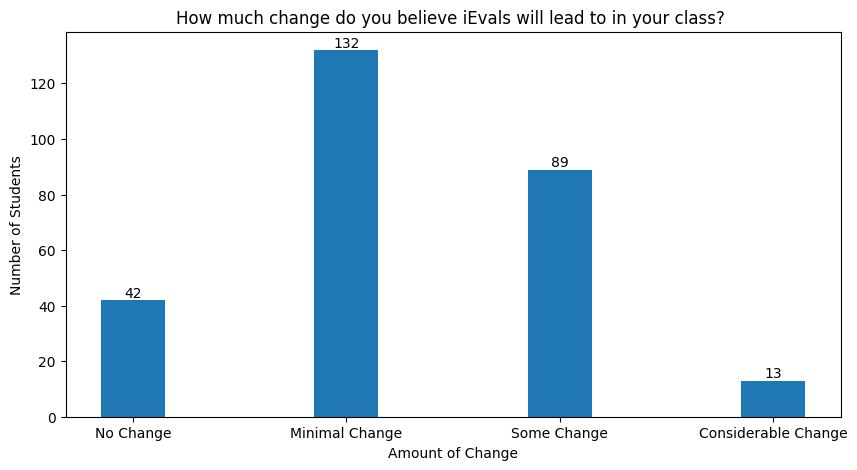

In [111]:
c3c = df[changes]
value_counts3c = df[changes].value_counts()
c3c = c3c.replace("No Change", '1')
c3c = c3c.replace("Minimal Change", '2')
c3c = c3c.replace("Some Change", '3')
c3c = c3c.replace("Considerable Change", '4')
c3cvalues = c3c.value_counts()

sortc3c = c3cvalues.sort_index()

plt.figure(figsize = (10, 5))
changechart = plt.bar(sortc3c.index, sortc3c.values, width = 0.3)
plt.bar_label(changechart, labels = sortc3c.values, label_type = "edge")

plt.title(change)

x_3clabels = ["No Change", "Minimal Change", "Some Change", "Considerable Change"]
plt.xticks(ticks=range(len(x_3clabels)), labels = x_3clabels)
plt.xlabel("Amount of Change")

plt.ylabel("Number of Students")

This is a bar graph representing the amount of change to class students believe the ievals will bring. The mode appears to be minimal change. Interestingly enough, none of the responses report major change.

Text(50.722222222222214, 0.5, 'Amount of Change')

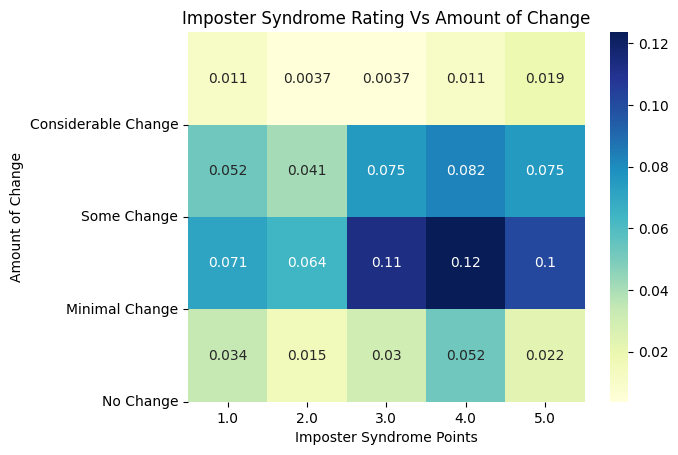

In [112]:
c3cimposter = [c3c, df[imposter]]
cross_table3d = pd.crosstab(c3cimposter[0],c3cimposter[1])
normalize3d = cross_table3d.div(cross_table3d.sum().sum())
table3d = sns.heatmap(normalize3d, cmap = 'YlGnBu', annot = True)
table3d.invert_yaxis()
plt.title("Imposter Syndrome Rating Vs Amount of Change")
plt.xlabel("Imposter Syndrome Points")

y_3dlabels = ["No Change", "Minimal Change", "Some Change", "Considerable Change"]
plt.yticks(ticks=range(len(y_3dlabels)), labels = y_3dlabels, rotation = 0)
plt.ylabel("Amount of Change")

This is a heatmap comparing the relationship between a student's imposter syndrome rating and the amount of change a student believes the iEvals bring to class. Each block represents a proportion of students who reported the imposter syndrome rating and degree of change pair. The darker blue areas represent a higher concentration while the light yellow areas represent a lower concentration. Based on the heatmap, most students reported an imposter syndrome rating of 3 and a minimal change. Other blue areas tend to fall around areas where imposter syndrome is 3-5 and change is minimal or some. This suggests that students tend to report a higher rating for imposter syndrome with minimal to some change to class.

Text(50.722222222222214, 0.5, 'Amount of Change')

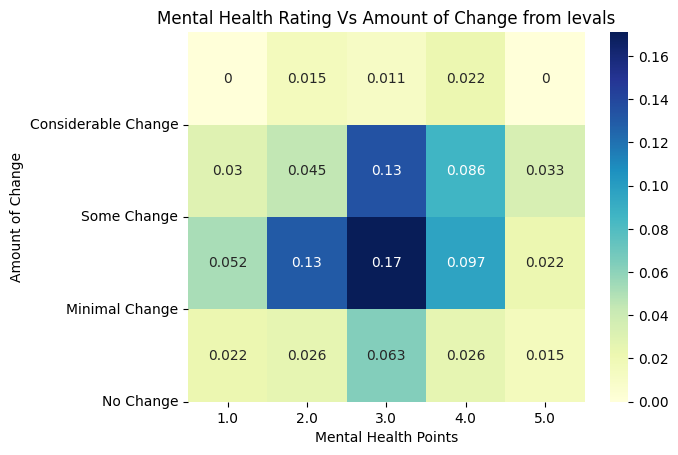

In [113]:
c3cmental = [c3c, df[mental]]
cross_table3e = pd.crosstab(c3cmental[0],c3cmental[1])
normalize3e = cross_table3e.div(cross_table3e.sum().sum())
table3e = sns.heatmap(normalize3e, cmap = 'YlGnBu', annot = True)
table3e.invert_yaxis()
plt.title("Mental Health Rating Vs Amount of Change from Ievals")
plt.xlabel("Mental Health Points")

y_3elabels = ["No Change", "Minimal Change", "Some Change", "Considerable Change"]
plt.yticks(ticks=range(len(y_3elabels)), labels = y_3elabels, rotation = 0)
plt.ylabel("Amount of Change")

#**Investigation of iEval Impact and Age (Edwin Lopez)**

**(1)What would you like to know?**
Belief that iEval will lead to change in the classroom grouped by Age:

We want to find out if age or indirectly time spent at the University of California - Riverside influences how much faith students have on their iEval evaluations making an impact.

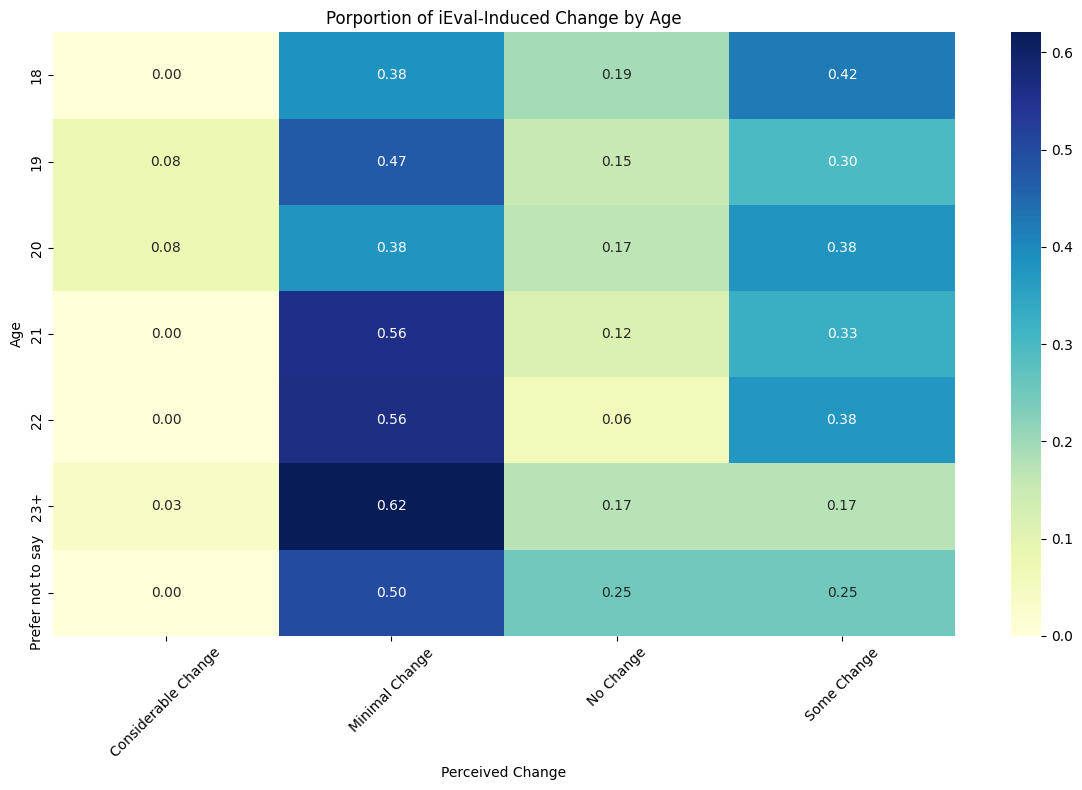

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
data = df
age_column = ' What is your age?'
ieval_change_column = 'How much change do you believe iEvals will lead to in your class? '

# Group by age
ieval_change_by_age = data.groupby(age_column)[ieval_change_column].value_counts(normalize=True).unstack(fill_value=0)

# DIsplay using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(ieval_change_by_age, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Porportion of iEval-Induced Change by Age')
plt.xlabel('Perceived Change')
plt.ylabel('Age')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


This is a heatmap comparing the relationship between a student's mental health rating and the amount of change a student believes the iEvals bring to class. Each block represents a proportion of students who reported the mental health rating and degree of change pair. The darker blue areas represent a higher concentration while the light yellow areas represent a lower concentration. Based on the heatmap, most students reported an mental health rating of 3 and a minimal change. Other blue areas tend to fall around areas where mental health is 2-4 and change is minimal or some. This suggests that students tend to report an average rating for mental health with minimal to some change to class.

In [115]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

age_column = ' What is your age?'
ieval_change_column = 'How much change do you believe iEvals will lead to in your class? '

# Chi-squared test contigency table
contingency_table = pd.crosstab(data[age_column], data[ieval_change_column])

# Chi-squared test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print
print(f"Chi-squared: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")


Chi-squared: 16.805284857675115
P-value: 0.5365285270455031
Degrees of Freedom: 18


The chi-squared test results, with a p-value of 0.521, suggest that there is not statistically significant association between students' ages and their belief in the effectiveness of iEvals. This means that, despite the trend observed in the heatmap, the variation in belief across age groups could also be influenced by not only age but also other factors.

These results could be due to other factors. Consequently, a student's year in the university, reflecting their accumulated experiences and interactions with the iEval system, may not align straightforwardly with their chronological age. Still I would still consider the finding to be valuable.

###**Hyphotheses Test** If students who believe iEvals lead to change are more likely to participate in future iEvals.

**Test: Logistic Regression Analysis**

In [116]:
import pandas as pd
import statsmodels.api as sm
import numpy as np  # For handling any potential infinite values

# Step 1: Load the Dataset
# Adjust the file path according to your local setup
data = df

# Step 2: Data Preprocessing
# Encoding for "Did you complete an iEval evaluation last quarter?"
data['iEval_Completed_Binary'] = data['Did you complete an iEval evaluation last quarter(Fall or last quarter you attended)? Choose one that applies:'].apply(lambda x: 1 if isinstance(x, str) and 'Yes' in x else 0)

# Encoding for "How much change do you believe iEvals will lead to in your class?"
change_encoding = {"No Change": 0, "Minimal Change": 1, "Some Change": 2, "Considerable Change": 3}
# Assuming you've verified the column name is exactly as below
data['Belief_in_iEval_Change'] = data['How much change do you believe iEvals will lead to in your class? '].map(change_encoding)

# Ensure there are no NaN or infinite values in your predictor variables 'X'
data = data.dropna(subset=['Belief_in_iEval_Change', 'iEval_Completed_Binary'])  # Drops rows where NaN exists in these columns

# Step 3: Logistic Regression Analysis
X = data[['Belief_in_iEval_Change']]  # Predictor variable
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = data['iEval_Completed_Binary']  # Response variable

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the model summary to review the analysis results
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.529209
         Iterations 5
                             Logit Regression Results                             
Dep. Variable:     iEval_Completed_Binary   No. Observations:                  276
Model:                              Logit   Df Residuals:                      274
Method:                               MLE   Df Model:                            1
Date:                    Tue, 05 Mar 2024   Pseudo R-squ.:                0.006582
Time:                            05:08:45   Log-Likelihood:                -146.06
converged:                           True   LL-Null:                       -147.03
Covariance Type:                nonrobust   LLR p-value:                    0.1642
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.9174      0.267      3.


The logistic regression output indicates that the belief in the effectiveness of iEvals has a positive but not statistically significant relationship with the likelihood of iEval completion among students. With a p-value of 0.092 for the belief in iEval effectiveness, the evidence is insufficient to conclude a definitive impact on iEval completion rates. The model's pseudo R-squared value of approximately 0.01 suggests a limited explanatory power, highlighting the potential influence of other unconsidered factors on students' decisions to complete iEvals.

# **Investiagtion of screen usage per day, using phone in class, news consumption, and completing iEvals (Isabel Chen)**
**(1)What would you like to know?**

I want to know if a student's time spent on their screen per day and how often they check their phone in class will effect their propensity to complete iEval;

Furthermore, I want to know the relationship between time spent on screen per day and news consumption.

Box Plot by Sethya Pugal


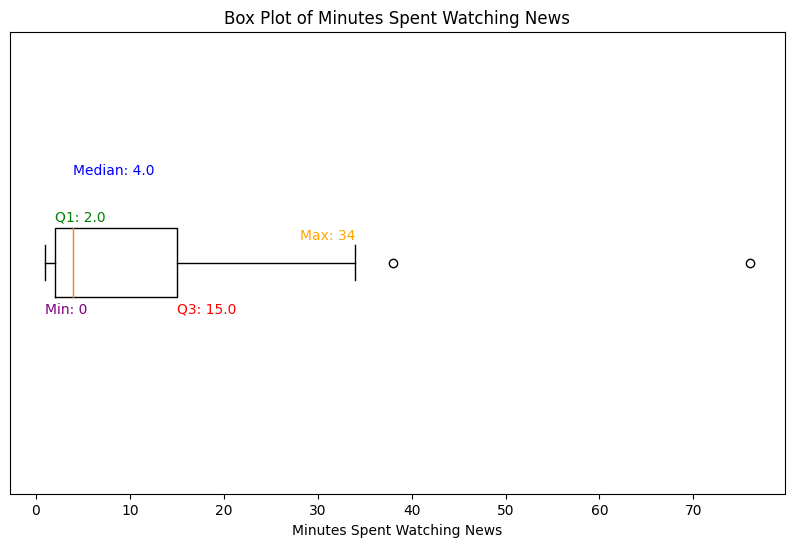

In [117]:

#Through manual data processing...
df_minutes = pd.read_csv("/content/drive/MyDrive/NewsInfo.csv")
df[news] = df_minutes["news"]
news_counts = df[news].value_counts()
plt.figure(figsize=(10, 6))
box = plt.boxplot(news_counts, vert=False)

# Add labels and title

median = news_counts.median()
q1 = news_counts.quantile(0.25)
q3 = news_counts.quantile(0.75)

plt.text(median, 1.2, f'Median: {median}', verticalalignment='center', horizontalalignment='left', color='blue')
plt.text(q1, 1.1, f'Q1: {q1}', verticalalignment='center', horizontalalignment='left', color='green')
plt.text(q3, 0.9, f'Q3: {q3}', verticalalignment='center', horizontalalignment='left', color='red')


min_val = box['caps'][0].get_xdata()[0]
max_val = box['caps'][1].get_xdata()[0]

plt.text(min_val, 0.90, f'Min: {0}', verticalalignment='center', horizontalalignment='left', color='purple')
plt.text(max_val, 1.06, f'Max: {max_val}', verticalalignment='center', horizontalalignment='right', color='orange')

plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

plt.xlabel('Minutes Spent Watching News')
plt.title('Box Plot of Minutes Spent Watching News')
print("Box Plot by Sethya Pugal")
# Show the plot
plt.show()

The box plot shows that the majority of college student dont spend that much time reading/watching the news.

Scatter plot by Katelyn Poon


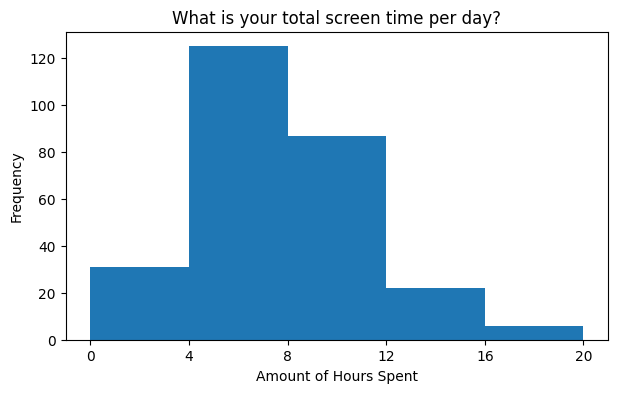

In [118]:
screen = df[screentime]
screen_value_counts = df[screentime].value_counts()
screen = screen.replace("0 - 4 hrs per day", 2)
screen = screen.replace("4 - 8 hrs per day", 6)
screen = screen.replace("8 - 12 hrs per day", 8)
screen = screen.replace("12 - 16 hrs per day", 14)
screen = screen.replace("16 - 24 hrs per day", 20)
screenvalues = screen.value_counts()

sortscreen = screenvalues.sort_index()

plt.figure(figsize = (7, 4))

bins = [0, 4, 8, 12, 16, 20]
plt.hist(screen, bins=bins, width = 4)
plt.title(screentime)
plt.xlabel('Amount of Hours Spent')
plt.xticks(bins)
plt.ylabel('Frequency')
print("Scatter plot by Katelyn Poon")
plt.show()

A histogram of number of hours spent for screen time. Each bin represents a range of four hours between the labeled amount of hours spent on x-ticks of the x axis. Based on the histogram, the mode appears to be between 4-8 hours of screen time. The graph is skewed to the right, which implies that students don't generally spend most of their day watching a screen. Instead, this suggests that students generally spend about 1/6 to a quarter of their day watching a screen on a device. We wanted to examine at this set of data to determine if there is a connection between watching a screen and doing the iEvals since students also have to use an electronic device to fill out their iEvals.

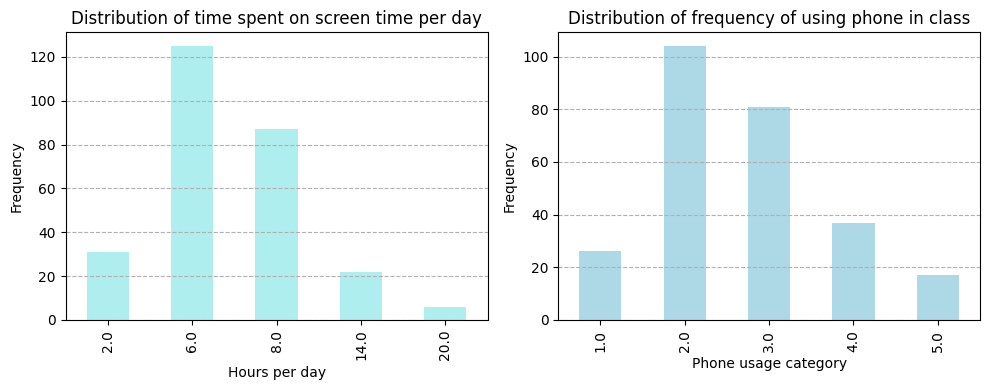

In [119]:
answer_mapping = {
    "0 - 4 hrs per day": 2,
    "4 - 8 hrs per day": 6,
    "8 - 12 hrs per day": 8,
    "12 - 16 hrs per day": 14,
    "16 - 24 hrs per day": 20
}
screen_num = 'screen time'
df[screen_num] = df[screentime].map(answer_mapping)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

df[screen_num].value_counts().sort_index().plot(kind='bar', color='paleturquoise', ax=axes[0])
axes[0].set_title('Distribution of time spent on screen time per day')
axes[0].grid(axis='y', linestyle='--')
axes[0].set_xlabel('Hours per day')
axes[0].set_ylabel('Frequency')

df[phone].value_counts().sort_index().plot(kind='bar', color='lightblue', ax=axes[1])
axes[1].set_title('Distribution of frequency of using phone in class')
axes[1].grid(axis='y', linestyle='--')
axes[1].set_xlabel('Phone usage category')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

* On the left, we have the distribution of time spent on screen per day, with the frequency of each time category plotted as a histogram chart.
A majority of student spend 4-8 hours or 8-12 hours a day on their phone, with an outlier that spend 16-20 hours a day.
* On the right, there is a bar chart showing the distribution of frequency for using a phone in class.
A majority of student rated 2/5 and 3/5 for how frequently they check the phon in class.



Since this graph shows that these two variables distributed the same way, we suspect that they are correlated to each other.

**Hyphothesis1:** Time spent on screen time per day is correlated to time spent using phone in class.

**Test: Chi-Square**


In [120]:
cross_tab_screen_phone = pd.crosstab(df[screen_num], df[phone])
chi, p, dfree, expected = chi2_contingency(cross_tab_screen_phone)
print("calculated chi square value: " ,chi)
print("calculated p value: " ,p)
print("degree of freedom: ", dfree)

calculated chi square value:  10.906558544188535
calculated p value:  0.8152158507104106
degree of freedom:  16


**Result1:** The high p-value indicating no relationship between these two variables. The frequency of students their phone in class has nothing to do with their attatchment to their screen.

Since there is no correlation between time spent on screen time per day and time spend using phone in class, I will treat them independently and proceed to compare Student Completion with these variables.

**Hyphothesis2:**  **Student Complete iEval** is correlated to **Time spent on screen** per day

**Test: Chi-Square**

In [121]:
answer_mapping = {
    "Yes. Class Incentive (e.g., extra credit or reward).":1,
    "Yes, I wanted to voice my opinion on professor/course.": 1,
    "No. Lack of incentives.": 0,
    "No. I missed the deadline.":0,
    "No. Too inconvenient or time-consuming.": 0
}
Completeness = 'Complete_short'
df[Completeness] = df[Complete].map(answer_mapping)

cross_tab_screen_num = pd.crosstab(df[screen_num], df[Completeness])

chi, p, dfree, expected = chi2_contingency(cross_tab_screen_num )
print("calculated chi square value: " ,chi)
print("calculated p value: " ,p)
print("degree of freedom: ", dfree)

calculated chi square value:  2.571226914152764
calculated p value:  0.6319285169057934
degree of freedom:  4


**Result2:** Student Complete iEval is independent on Time spent on screen per day

**Hyphothesis3:**  **Student Complete iEval** is correlated to **frequency for checking phone in calss**

**Test: Chi-Square**

In [122]:
cross_tab_screen_num = pd.crosstab(df[phone], df[Completeness])
chi, p, dfree, expected = chi2_contingency(cross_tab_screen_num )
print("calculated chi square value: " ,chi)
print("calculated p value: " ,p)
print("degree of freedom: ", dfree)

calculated chi square value:  17.714069123198826
calculated p value:  0.0014034115395374265
degree of freedom:  4


**Result3**:Student Complete iEval is correlated to frequency of checking phone in class

Interestingly, Student Completion in iEval is independent of the time spent on screen per day but is dependent on the frequency of checking the phone in class. Because of this result, I want to further investigate the time spent on screen and compare it with the frequency of reading/watching the news. Watching the news could indicate whether students are engaged with societal issues and may have a connection to iEval.

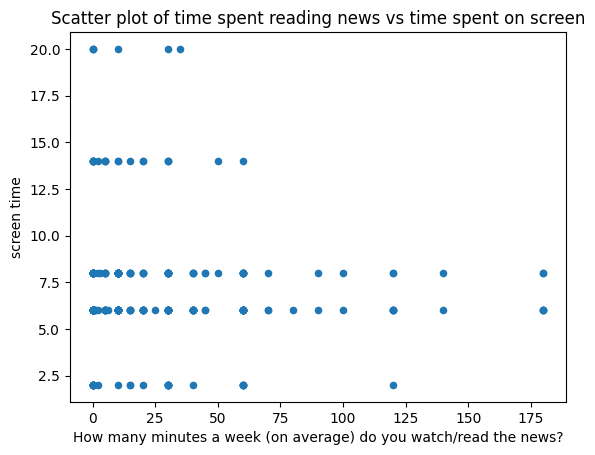

In [123]:
df_clean = df.dropna(subset=[news, screen_num])
df_clean.plot(kind='scatter', x=news, y=screen_num, title='Scatter plot of time spent reading news vs time spent on screen')
plt.show()


We observe the same distribution among each group of students. Regardless of the amount of time they spend using their phones in class, they exhibit the same pattern in terms of time spent reading the news. This suggests that these two variables are independent.

Up to this point, we have not relied on the Pearson correlation test. However, I would like to determine if the time spent on reading news is correlated with the time spent talking to parents.

**Hyphothesis4:**  **Time spent on news** per day is not correlated to **Time spent on talking to parents** per day

**Test: Pearson Correlation**

In [124]:
talk_p = 'How many minutes a day (on average) do you talk to your parents?'

df[talk_p] = pd.to_numeric(df[talk_p], errors='coerce')
mode_value = df[talk_p].mode()[0]
df[talk_p] = df[talk_p].fillna(mode_value)
value_counts = df[talk_p].value_counts()
single_value_counts = value_counts[value_counts == 1]
df.loc[df[talk_p].isin(single_value_counts.index), talk_p] = mode_value
df[news] = pd.to_numeric(df[news], errors='coerce')
df[news] = df[news].fillna(df[news].mode()[0])
df_clean = df.dropna(subset=[news, talk_p])
x = df_clean[news]
y = df_clean[talk_p]


corr_coefficient, p_value = pearsonr(x, y)

print(f"Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")


NameError: name 'pearsonr' is not defined

**Result4:** The correlation coefficient is very close to 0, indicating a very weak or nonexistent linear relationship between the two variables being compared. The time spent watching the news appears to have no relation to the time spent talking to parents.

#**Conclusion**
---
There is no observed relationship between overall screen time and phone usage in class. Students’ frequency of phone use during class does not seem to influence their overall attachment to their screens.

Student Completion in iEval is not affected by the time spent on screens per day, suggesting that screen time does not have a direct impact on the completion of iEval tasks or assessments.

However, there is a correlation between Student Completion in iEval and the frequency of checking phones in class. This indicates that students who more frequently check their phones in class may have a different level of engagement or performance with iEval activities.

Lastly, the time spent watching the news is not linearly related to the time spent talking to parents, as indicated by a correlation coefficient near zero. This suggests that these two activities, which could be indicators of engagement with societal issues and family communication respectively, do not have an  obvious linear relationship.



#**Investigating Percieved Impact and Completing iEvals (Sethya Pugal)**

In [ ]:
#heatmap conditional
def completed_given_change():
    heat_df = df
    heat_df[completed] = heat_df[completed].replace({"I did for some not for all of my classes. I wanted to leave good reviews for TA's and Professors, but I missed the deadline for some.": "I missed some"})
    crosstab_result = pd.crosstab(heat_df[completed], heat_df[change])
    conditional_dist = crosstab_result.div(crosstab_result.sum(axis=0), axis=1)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conditional_dist, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Conditional Probability'})
    # Set axis labels and plot title
    plt.xlabel(change)
    plt.ylabel("Reason for completing an Ieval last quarter")
    plt.title('Conditional Distribution of {} given {}'.format("Reasons for Completion", "Change that it will lead to"))
    # Display the plot
    plt.show()
    markdown_table = crosstab_result.to_markdown()
    print('\n' + markdown_table)

In [ ]:
completed_given_change()

The heatmap analysis reveals a notable concentration of dark colors in areas associated with yes to filling out iEvals. People still fill out ievals despite their opinion on the impact of iEvals. Therefore, my hypothesis regarding these 2 factors is that they are independent.

##**Hypothesis: Reason and Impact are independent**

**H0:** There is no dependency between the **reason** behind filling out an Ieval, and the **impact** that students believe Ievals have.

**Chi-Square Test:**


> **p-value 0.5999** according to the chi square test, the two factors are independent

In [ ]:

from scipy.stats import chi2_contingency
heat_df = df
heat_df[completed] = heat_df[completed].replace({"I did for some not for all of my classes. I wanted to leave good reviews for TA's and Professors, but I missed the deadline for some.": "I missed some"})
crosstab_result = pd.crosstab(heat_df[completed], heat_df[change])
conditional_dist = crosstab_result.div(crosstab_result.sum(axis=0), axis=1)

chi2, p, _, _ = chi2_contingency(crosstab_result)

# Print the results
print("Chi-squared value:", chi2)
print("P-value:", p)

# Interpret the results
alpha = 0.05  # Set your significance level
print("Significance level:", alpha)
correlation = "Students completion of Ieval and the change they believe Ievals have"
if p < alpha:
    print(f"Reject the null hypothesis. There is a significant association between {correlation}")
else:
    print(f"Fail to reject the null hypothesis. There is no significant association between {correlation}")

#**Conclusion**

---


Employing a heat map combined with a chi-squared test, demonstrated that regardless of the perceived impact, students exhibit a consistent inclination to engage in the evaluation process of iEvals.

#**Investigation of Gender Ethnicity and Voting (Sethya Pugal)**

I am interested in the relationship between gender, ethnicity and voting. First I want to investigate the population distribution for gender and ethnicity so I can see which groups I have enough data of.

In [ ]:
#distributions
lavender_color = '#9370DB'
colors = [lavender_color,'lightgreen','lightblue','lightcoral']
def gender_distribution():
    df[gender].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()
def ethnicity_distribution():
    df['Ethnicity_Grouped'].value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title('Ethnicity Distribution')
    plt.xlabel('Ethnicity')
    plt.ylabel('Count')
    plt.show()
def ethnicity_and_gender_distribution():
    crosstab_result = pd.crosstab(df["Ethnicity_Grouped"], df[gender])
    crosstab_result.plot(kind="bar", title="Ethnicity and Gender Distribution", color = colors)

In [ ]:
#conditionals
def conditional_voted_given_gender():
    # represent with bar graph
    crosstab_result = pd.crosstab(df[gender], df[voting])
    conditional_distribution = crosstab_result.div(crosstab_result.sum(axis=1), axis=0)
    conditional_distribution.plot(kind='barh', stacked=True, color=colors[0:2])
    plt.title('Voted Given Gender')
    plt.ylabel('Gender')
    plt.xlabel('Probability')
    plt.legend(title='Voted')
    plt.legend(title='Voted', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def conditional_voted_given_ethnicity():
    # represent usng bar graph
    crosstab_result = pd.crosstab(df["Ethnicity_Grouped"], df[voting])
    conditional_distribution = crosstab_result.div(crosstab_result.sum(axis=1), axis=0)
    conditional_distribution.plot(kind='barh', stacked=True, color=colors[0:2])
    plt.title('Voted Given Ethnicity')
    plt.ylabel('Ethnicity')
    plt.xlabel('Probability')
    plt.legend(title='Voted')
    plt.legend(title='Voted', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def conditional_given_ethnicity_and_gender():
    # bar graph
    genders = ["Male", "Female"]
    voting_groups = ["Yes", "No"]
    crosstab_result = pd.crosstab([df["Ethnicity_Grouped"], df[gender]], df[voting], margins=True,
                                  margins_name="Total")
    conditional_distribution = crosstab_result.div(crosstab_result["Total"], axis=0).drop(columns="Total")
    for gen in genders:
        plotting(conditional_distribution, gen)

def plotting(distributions, gen):
    data = {}
    ethnicities = []
    if gen == "Male":
      ethnicities = ["Asian", "Hispanic or Latino", "Other", "White"]
      ehtnicities = ethnicities[:-1]
    if gen == "Female":
      ethnicities = ["Asian", "Other"]
    for group in ethnicities:
        if (group, gen) in distributions.index and 'Yes' in distributions.columns:
            data[f'{group},yes'] = distributions.loc[(group, gen), 'Yes']
        else:
            data[f'{group},yes'] = 0
        if (group, gen) in distributions.index and 'No' in distributions.columns:
            data[f'{group},no'] = distributions.loc[(group, gen), 'No']
        else:
            data[f'{group},no'] = 0
    yes_values = [data[ethnicity + ',yes'] for ethnicity in ethnicities]
    no_values = [data[ethnicity + ',no'] for ethnicity in ethnicities]

    fig, ax = plt.subplots()
    bar_width = 0.359887
    index = np.arange(len(ethnicities))

    bars_yes = ax.bar(index, yes_values, bar_width, label='Yes', color=colors[2])
    bars_no = ax.bar(index + bar_width, no_values, bar_width, label='No', color=colors[3])

    # Adding labels and title
    ax.set_xlabel('Ethnicities')
    ax.set_ylabel('Percentage')
    ax.set_title("Voted Given " + gen + " and Ethnicities")

    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(ethnicities)
    # Adding legend
    ax.legend()



In [ ]:
gender_distribution()

Distributions that have the most potential:

*   Female
*   Male

Population Distributions that are lackluster:
*  Non-binary
*  Prefer not to say





In [ ]:
conditional_voted_given_gender()

In [ ]:
ethnicity_distribution()

In [ ]:
df["Ethnicity_Grouped"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.title("Distribution of Ethnicity_Grouped")
plt.show()

Asians take up the majority while Other (ehtnicities < 10) take up about 13-16 percent

In [ ]:
conditional_voted_given_ethnicity()

All of the groups given ethnicitiy tip towards yes, with other, Whtie, Other, and Asian being slightly skewed towards yes.

In [ ]:
ethnicity_and_gender_distribution()


Categories that are ok to use based on population Distribtion:

Male:

*   Asian Male
*   Hispanic Male
*   White Male
*   Other Male

Female:

*   Asian Female
*   Other Female




In [ ]:
conditional_given_ethnicity_and_gender()

Males:

*   Asian given male and White given male are clsoe to 50/50 split
*   Other given male comes close to 50-50 as well
*   Hispanics given male are about 70/30

Females:
*   Asian given female is aroudn 60/40
*   Other given female is around 90/10






In [ ]:
conditional_voted_given_ethnicity()

Going back to Voted Given Ethnicity, we can infer that the prime reasoning for the Asian group being slightly skewed towards yes is because of the majority yes among Asian females.

In [ ]:
conditional_voted_given_gender()

Going back to voted given gender, Males are ever so slightly skewed towards yes primarily due to the 70/30 split among Hispanic males.

From looking at the data, I see potiential in the following hyoptheses:

*   Gender and Voting are dependent factors
*   Gender with ethnicity and voting are dependent factors



##**Hyphothesis: Gender and Voting are Dependent**

**H0:** **Gender** with **voting** are Independent factors

**Chi-Square Test:**


> **p-value 0.03227** according to the chi square test, there is a statistically significant association between a student's gender and their propensity to vote.


In [ ]:
# Assuming df is your DataFrame
selected_ethnicities = ['Hispanic or Latino', 'Asian', 'White']
df_filtered = df[ (df[gender] != 'Non-binary') &
                 (df[gender] != 'Prefer not to say')]

# Create a contingency table
gender_ethnicity = pd.crosstab([df_filtered[gender]], df_filtered[voting])
# Perform the chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(gender_ethnicity)

print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of freedom: {dof}")

##**Hyphothesis Gender + Ethincity and voting are Dependent**

**H0:** **Gender** and **Ethnicity** with **voting** are Independent factors

**Chi-Square Test:**


> **p-value 0.13449** is high, and therefore we cannot rule out the null hypothesis, so they are not dependent.

In [ ]:
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame
selected_ethnicities = ['Hispanic or Latino', 'Asian', 'White']
df_filtered = df[df['Ethnicity_Grouped'].isin(selected_ethnicities) &
                 (df[gender] != 'Non-binary') &
                 (df[gender] != 'Prefer not to say')]

# Create a contingency table
gender_ethnicity = pd.crosstab([df_filtered["Ethnicity_Grouped"], df_filtered[gender]], df_filtered[voting])
# Perform the chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(gender_ethnicity)

print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of freedom: {dof}")

#**Conclusion**

---

In conclusion, despite the limitations posed by a small sample size, the study yielded intriguing findings. Notably, a significant association between gender and voting emerged, indicating a higher likelihood of women participating in the voting process compared to males within the sampled population.

Furthermore, upon introducing ethnicity into the analysis, it became evident that there is no discernible correlation between ethnicity and gender in relation to voting behavior. Noteworthy statistics highlight the distinctive trend of Hispanic/Latino males exhibiting the highest affirmative response, in stark contrast to the apparent indifference observed among Asians and White males.


#**Investigation of Academic Year and Voting Participation (Owen Davis)**

**(1)What would you like to know?**
If academic year affects class and voting participation:

In [ ]:
# Standing & Class Size Question Variables
standing = "What is your current class standing?"
large_class = "Rank how much you participate in class based on these class size: [Lecture greater than 100 students]"

# Cleaning N/A From Standing & Class Size Question Variables
df[standing] = df[standing].fillna('Prefer not to say')
df[large_class] = df[large_class].fillna('Prefer not to say')

**Null Hypothesis 1:** Class standing will have no impact on class participation.

In [ ]:
standing_order = ['Freshman', 'Sophomore', 'Junior', 'Senior']
response_order = ['1 (Most likely to participate)', '4 (Least likely to participate)']

df_filtered = df[(df[large_class] != '2') & (df[large_class] != '3') & (df[large_class] != 'Prefer not to say')]

class_standing = pd.crosstab(df[standing], df_filtered[large_class])
class_standing= class_standing.sort_values(by=response_order)
bar_colors = ['green', 'black']
class_standing = class_standing.reindex(standing_order)
class_standing.plot(kind='bar', figsize=(10, 6), color=bar_colors, width=0.6, stacked=True)
plt.title('Standing & Large Class Participation')
plt.grid(axis='y', linestyle='--')
plt.xlabel('Standing')
plt.ylabel('Student Count')
plt.show()

chi, p, dfree, expected = chi2_contingency(class_standing)
print("calculated chi square value: " ,chi)
print("calculated p value: " ,p)
print("degree of freedom: ", dfree)

Applying a chi squared test proves a correlation between higher academic standing and participation in large classes, thus rejecting the null hypothesis.

**Null Hypothesis 2:** Academic standing will not affect voter turnout

In [ ]:
standing_order = ['Freshman', 'Sophomore', 'Junior', 'Senior']
response_order = ['yes', 'no']

class_standing = pd.crosstab(df[standing], df[voting])
bar_colors = ['black', 'green']
class_standing = class_standing.reindex(standing_order)
class_standing.plot(kind='bar', figsize=(10, 6), color=bar_colors, width=0.6, stacked=True)
plt.title('Standing & Voting')
plt.grid(axis='y', linestyle='--')
plt.xlabel('Standing')
plt.ylabel('Student Percentage')
plt.show()

from scipy.stats import chi2_contingency

chi, p, dfree, expected = chi2_contingency(class_standing)
print("calculated chi square value: " ,chi)
print("calculated p value: " ,p)
print("degree of freedom: ", dfree)

A Chi squared test shows that higher academic standing is inversely correlated with voter turnout, thus rejecting the null hypothesis.

#**Conclusion**
---
The analysis shows that the as students progress thorugh their academic careers they become more engaged in their studies and less likely to vote. This suggests that being proactive in one's personal life does not translate into an increased desire to vote. Reasons could include increased need to engage with academics when advancing to harder courses, increased cynicism about voting with age, and voting losing it's appeal after the novelty of someone voting in their first election.